#ANN Diabetes classification using Keras

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# first neural network with keras make predictions
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
dataset = loadtxt('/content/drive/MyDrive/Colab Notebooks/Diabetes/native-diabetes.data.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

The Pima Indians Diabetes database from the National Institute of Diabetes and Digestive and Kidney Diseases is a dataset that contains 768 instances containing attributes from women that are at least 21 yeasr old and of Pima Native American heritage living near Phoenix, Arizona and taken during reoutine medical care.

Features:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

Prediction:
The feature Class variable is interpreted as "tested positive for diabetes" if it is 1.




In [24]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

<span class="girk">Q: Define the keras model base the model summary below. All the hidden layer acrivation function are "Relu" , last layer activation funtion use 'sigmoid". </span>

In [25]:
#Defining the Keras model

#Initialize the ANN
#First create an empty ANN
classifier = Sequential()

#Add input layer and first hidden layer to our model
#Units = 20 (using 20 nodes hidden layer)
#Weight Initialization Function: HE uniform
#Activation Function: RELU
#input_dim = 8 (there are 8 input features)
classifier.add(Dense(units=20,kernel_initializer="he_uniform",input_dim=8,activation='relu'))

#hidden layers
classifier.add(Dense(units=20,kernel_initializer="he_uniform",activation='relu'))
classifier.add(Dense(units=20,kernel_initializer="he_uniform",activation='relu'))
classifier.add(Dense(units=20,kernel_initializer="he_uniform",activation='relu'))
classifier.add(Dense(units=20,kernel_initializer="he_uniform",activation='relu'))
classifier.add(Dense(units=8,kernel_initializer="he_uniform",activation='relu'))

#output layer
#Activation Function: SIGMOID (Classification Problem)
#output_dim = 1
#Weight Initialization Function: Xavier-Glorot
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation='sigmoid'))

In [26]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                180       
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 8)                 168       
                                                                 
 dense_13 (Dense)            (None, 1)                

In [27]:
#Compile the Keras model
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Fit the Keras model on dataset
classifier.fit(X,y,epochs=100,batch_size=10,verbose=1)

# Fit the Keras model on the dataset with a validation split
history = classifier.fit(X, y, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

#Make predictions with the model
predictions = (classifier.predict(X) > 0.5).astype(int)

#Summarize the first 5 cases
for i in range(50):
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

#rounded=[round(x[0])for x in predictions]
#print(rounded)

scores = classifier.evaluate(X,y)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Epoch 1/100
77/77 [==============================] - 1s 2ms/step - loss: 2.5778 - accuracy: 0.5938
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 1.3593 - accuracy: 0.5781
Epoch 3/100
77/77 [==============================] - 0s 3ms/step - loss: 1.0792 - accuracy: 0.6159
Epoch 4/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8695 - accuracy: 0.6120
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8508 - accuracy: 0.6589
Epoch 6/100
77/77 [==============================] - 0s 3ms/step - loss: 1.0192 - accuracy: 0.6510
Epoch 7/100
77/77 [==============================] - 0s 3ms/step - loss: 0.9977 - accuracy: 0.6172
Epoch 8/100
77/77 [==============================] - 0s 3ms/step - loss: 0.7361 - accuracy: 0.6836
Epoch 9/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8935 - accuracy: 0.6302
Epoch 10/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8485 - accuracy: 0.6549
Epoch 11/

<ipython-input-27-700dd20c1150>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


Accuracy: 81.25%


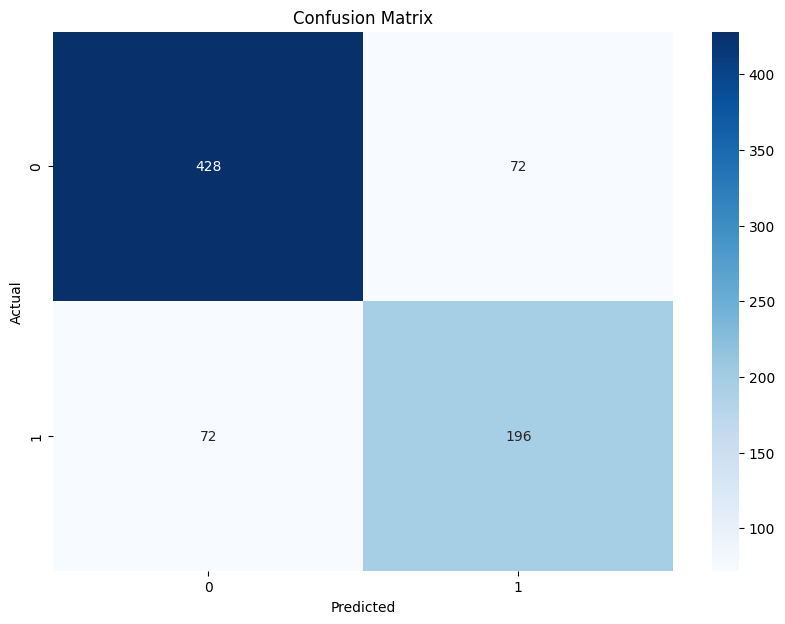

In [28]:
# Evaluate the model
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

#Confusion Matrix
cm = confusion_matrix(y,predictions)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
# Classification Report
class_report = classification_report(y, predictions, target_names=['Negative', 'Positive'], output_dict=True)

# Display Summary of Metrics
print("\nClassification Report:")
print(f"{'Metric':<20}{'Negative':<15}{'Positive':<15}")
print(f"{'-'*50}")
print(f"{'Precision':<20}{class_report['Negative']['precision']:<15.2f}{class_report['Positive']['precision']:<15.2f}")
print(f"{'Recall':<20}{class_report['Negative']['recall']:<15.2f}{class_report['Positive']['recall']:<15.2f}")
print(f"{'F1-Score':<20}{class_report['Negative']['f1-score']:<15.2f}{class_report['Positive']['f1-score']:<15.2f}")
print(f"{'Support':<20}{class_report['Negative']['support']:<15}{class_report['Positive']['support']:<15}")

# Overall metrics
print(f"\n{'Overall Accuracy':<20}{accuracy*100:.2f}%")
print(f"{'Overall Precision':<20}{class_report['macro avg']['precision']*100:.2f}%")
print(f"{'Overall Recall':<20}{class_report['macro avg']['recall']*100:.2f}%")
print(f"{'Overall F1-Score':<20}{class_report['macro avg']['f1-score']*100:.2f}%")


Classification Report:
Metric              Negative       Positive       
--------------------------------------------------
Precision           0.86           0.73           
Recall              0.86           0.73           
F1-Score            0.86           0.73           
Support             500            268            

Overall Accuracy    81.25%
Overall Precision   79.37%
Overall Recall      79.37%
Overall F1-Score    79.37%


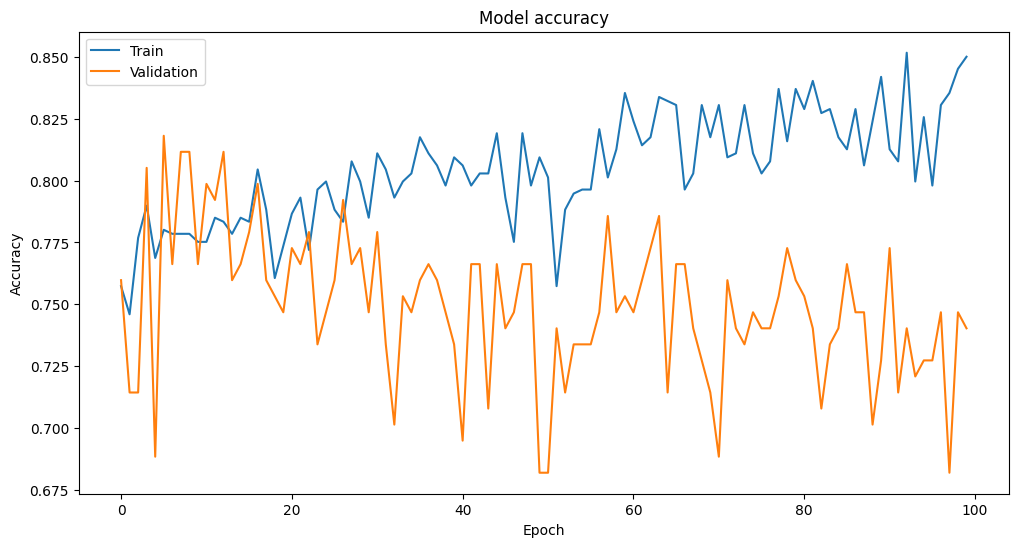

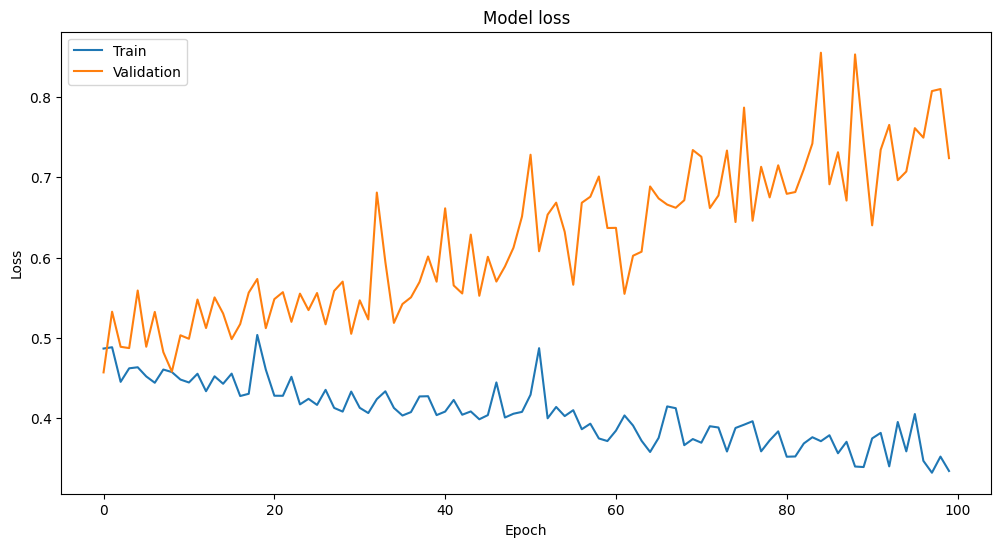

In [30]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()